In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading data
suicide=pd.read_csv(r'C:\Users\Durvas\Downloads\Suicides in India 2001-2012.csv.zip')

In [94]:
#view the data
suicide.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
#Basic info of data
suicide.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [7]:
#describe the data
suicide.describe(include="all" )

,State,Year,Type_code,Type,Gender,Age_group,Total
count,237519,237519.000000,237519,237519,237519,237519,237519.000000
unique,38,NaN,5,69,2,6,NaN
top,Madhya Pradesh,NaN,Causes,Others (Please Specify),Male,15-29,NaN
freq,6792,NaN,109200,7263,118879,45223,NaN
mean,NaN,2006.500448,NaN,NaN,NaN,NaN,55.034477
std,NaN,3.452240,NaN,NaN,NaN,NaN,792.749038
min,NaN,2001.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,2004.000000,NaN,NaN,NaN,NaN,0.000000
50%,NaN,2007.000000,NaN,NaN,NaN,NaN,0.000000
75%,NaN,2010.000000,NaN,NaN,NaN,NaN,6.000000


In [8]:
#missing values count
suicide.isnull( ).sum( )

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [9]:
#find duplicate value
suicide.duplicated( ).sum( )

0

In [15]:
#unique values in the data
suicide['Type_code'].unique( )

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [ ]:
suicide['State'].unique( )

In [13]:
suicide['Type'].unique( )

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

In [48]:
suicide['Age_group'].unique( )

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [15]:
suicide['Total'].unique( )

array([   0,    1,    8, ..., 3927, 1513, 5451], dtype=int64)

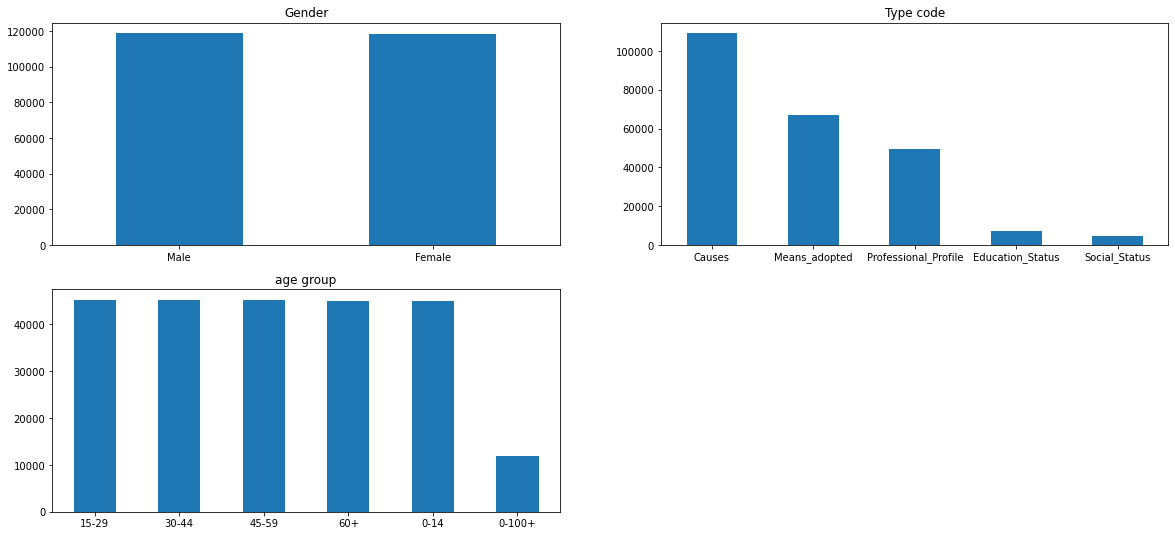

In [74]:
plt.subplot(2,2,1)
suicide['Gender'].value_counts( ).plot(kind='bar', title='Gender',figsize=(20,9))
plt.xticks(rotation=0)
plt.subplot(2,2,2)
suicide['Type_code'].value_counts( ).plot(kind='bar',title='Type code')
plt.xticks(rotation=0)
plt.subplot(2,2,3)
suicide['Age_group'].value_counts( ).plot(kind='bar',title='age group')
plt.xticks(rotation=0)
plt.show( )

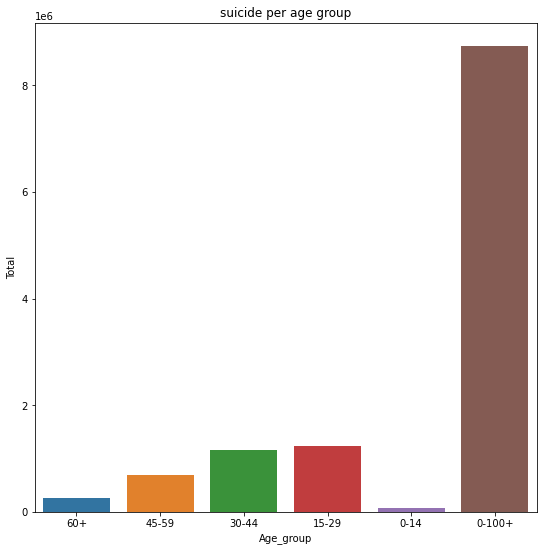

In [95]:
#suicide per age group
age_group=suicide.groupby('Age_group')['Total'].sum( )
age=pd.DataFrame(age_group).reset_index( ).sort_values('Age_group', ascending=False)
plt.figure(figsize=(9,9))
sns.barplot(x='Age_group', y='Total',data=age)
plt.title('suicide per age group')
plt.show( )

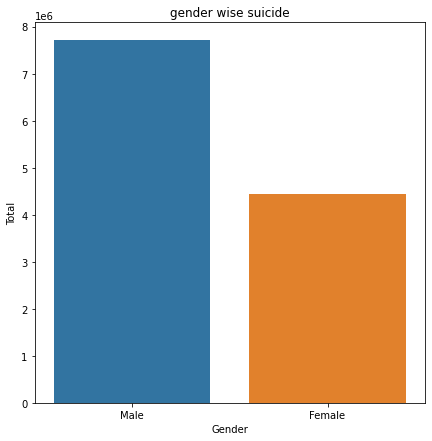

In [64]:
#Gender wise suicide
gender=pd.DataFrame(suicide.groupby('Gender') ['Total'].sum( )).reset_index( ).sort_values('Gender', ascending=False)
plt.figure(figsize=(7,7))
sns.barplot(x='Gender',y='Total',data=gender)
plt.title('gender wise suicide')
plt.show( )

In [97]:
#remove unnecssary values
suicide=suicide.drop(suicide[(suicide.State==('Total (Uts)')) | (suicide.State==('Total (All India)')) | (suicide.State=='Total (States)')].index)

In [ ]:
suicide=suicide.drop(suicide[(suicide.Type==('Others (Please Specify)'))].index)

In [4]:
suicide=suicide.drop(suicide[(suicide.Type==('Others (Please Specify)'))].index)

In [19]:
suicide=suicide.drop(suicide[(suicide.Type==('By Other means','By Other means (please specify)'))].index)

In [60]:
suicide=suicide.drop(suicide[(suicide.Type==('Other Causes (Please Specity)')) |(suicide.Type==('Causes Not known'))].index)

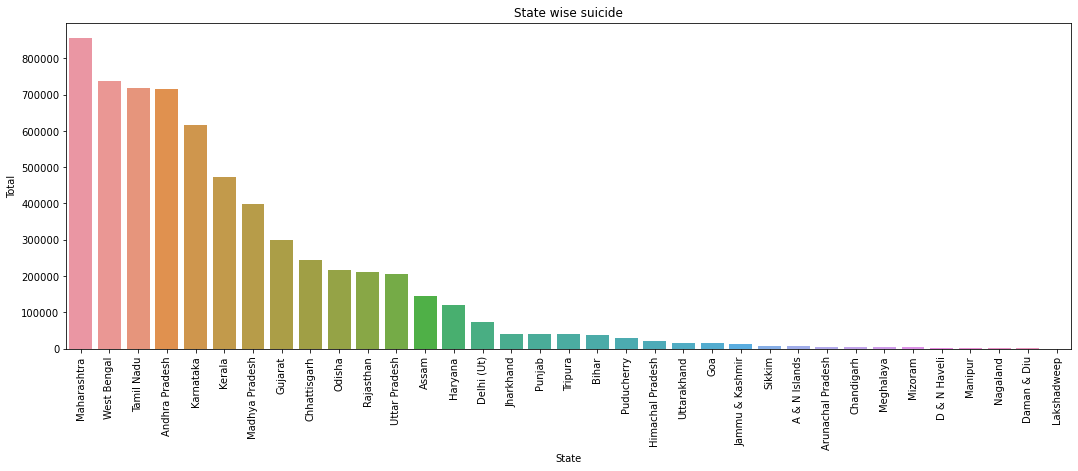

In [98]:
#statewise suicide
state=suicide.groupby('State') ['Total'].sum( )
total_suicides=pd.DataFrame(state).reset_index( ).sort_values('Total',ascending=False )
fig, ax=plt.subplots(figsize=(18,6))
g=sns.barplot(x='State',y='Total',data=total_suicides)
g.set_xticklabels(g.get_xticklabels( ) ,rotation=90)
plt.title('State wise suicide')
plt.show( )

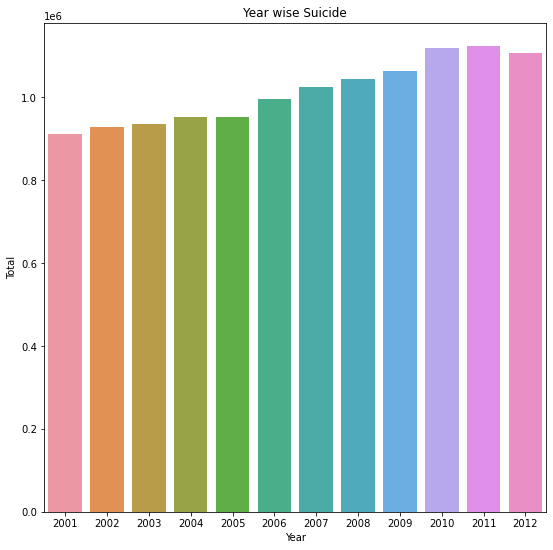

In [69]:
#year wise suicide
year=pd.DataFrame(suicide.groupby('Year')['Total'].sum( )).reset_index( ).sort_values('Year',ascending=False)
plt.figure(figsize=(9,9))
sns.barplot(x='Year',y='Total',data=year)
plt.title('Year wise Suicide')
plt.show( )

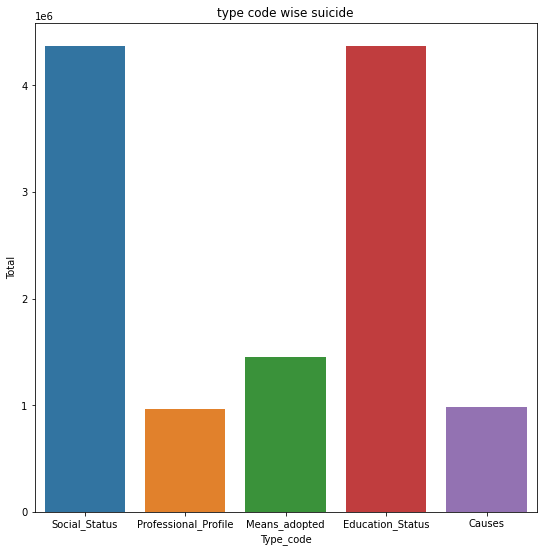

In [70]:
#type code wise suicide
p=suicide.groupby('Type_code')['Total'].sum( )
type_p=pd.DataFrame(p).reset_index( ).sort_values('Type_code',ascending=False)
plt.figure(figsize=(9,9))
sns.barplot(x='Type_code',y='Total',data=type_p)
plt.title('type code wise suicide')
plt.show( )

In [29]:
Typecode1=suicide[suicide['Type_code']=='Social_Status']
Typecode1

,State,Year,Type_code,Type,Gender,Age_group,Total
552,A & N Islands,2001,Social_Status,Married,Female,0-100+,38
553,A & N Islands,2001,Social_Status,Seperated,Female,0-100+,0
554,A & N Islands,2001,Social_Status,Widowed/Widower,Female,0-100+,0
555,A & N Islands,2001,Social_Status,Divorcee,Female,0-100+,0
556,A & N Islands,2001,Social_Status,Never Married,Female,0-100+,12
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [30]:
#unique values of social status
social_status=Typecode1['Type'].unique( )
social_status

array(['Married', 'Seperated', 'Widowed/Widower', 'Divorcee',
       'Never Married'], dtype=object)

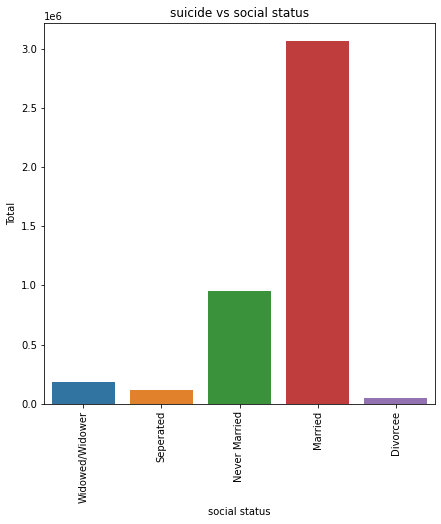

In [100]:
#suicide vs social status
typecode1=suicide[suicide['Type_code']=='Social_Status']
type1=data.groupby('Type').sum( ).Total
social_st=pd.DataFrame(type1).reset_index( ).sort_values('Type',ascending=False)
plt.figure(figsize=(7,7))
a=sns.barplot(x='Type',y='Total',data=social_st)
a.set_xticklabels(a.get_xticklabels( ),rotation=90)
plt.xlabel('social status')
plt.title('suicide vs social status')
plt.show( )

In [85]:
#type = education status
typecode2=suicide[suicide['Type_code']=='Education_Status']
type2=typecode2.groupby('Type').sum( ).Total
type2

Type
Diploma                                       42459
Graduate                                      93822
Hr. Secondary/Intermediate/Pre-Universit     356724
Matriculate/Secondary                        769698
Middle                                      1028913
No Education                                 965271
Post Graduate and Above                       22425
Primary                                     1088481
Name: Total, dtype: int64

In [86]:
#unique values
typecode2['Type'].unique( )

array(['Diploma', 'No Education', 'Post Graduate and Above', 'Middle',
       'Graduate', 'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary'], dtype=object)

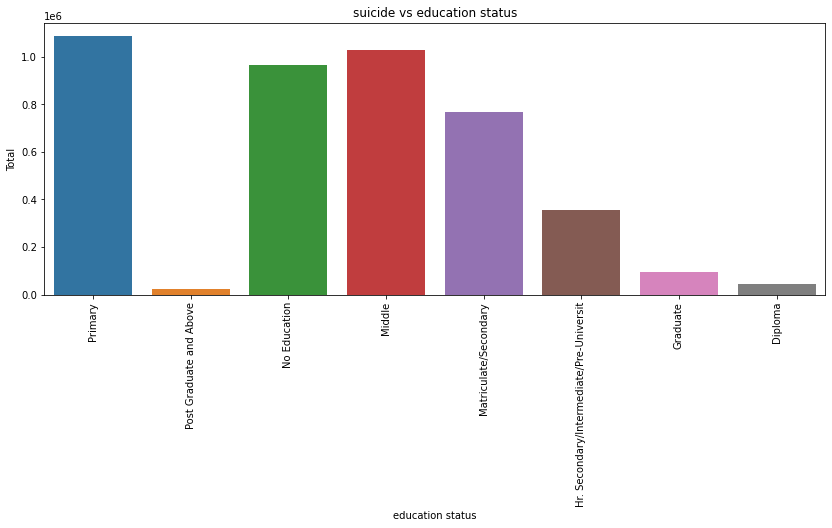

In [91]:
#suicide vs Education status
typecode2=suicide[suicide['Type_code']=='Education_Status']
type2=typecode2.groupby('Type').sum( ).Total
edu_st=pd.DataFrame(type2).reset_index( ).sort_values('Type',ascending=False)
plt.figure(figsize=(14,5))
e=sns.barplot(x='Type',y='Total',data=edu_st)
e.set_xticklabels(e.get_xticklabels( ),rotation=90)
plt.xlabel('education status')
plt.title('suicide vs education status')
plt.show( )

In [6]:
#type = professional profile
prof_profile=suicide[suicide['Type_code']=='Professional_Profile']
prof_tp=prof_profile.groupby('Type').sum( ).Total
total=pd.DataFrame(prof_tp).reset_index( ).sort_values('Type',ascending=True)

In [7]:
#unique values
prof_profile['Type'].unique( )

array(['Retired Person', 'Unemployed', 'Public Sector Undertaking',
       'Service (Private)', 'House Wife',
       'Self-employed (Business activity)', 'Professional Activity',
       'Student', 'Farming/Agriculture Activity', 'Service (Government)'],
      dtype=object)

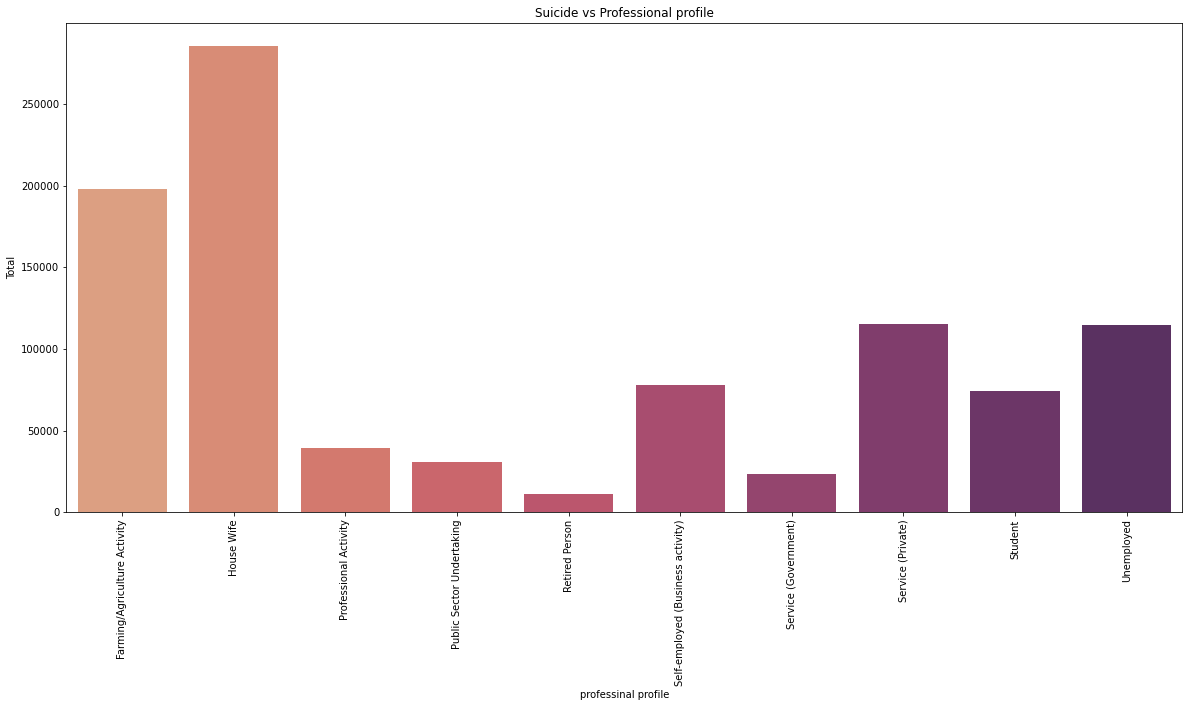

In [92]:
#suicide vs professional profile
plt.figure(figsize=(20,9))
p=sns.barplot(x='Type',y='Total',data=total,palette='flare')
p.set_xticklabels(p.get_xticklabels( ) ,rotation=90)
plt.xlabel('professinal profile')
plt.title('Suicide vs Professional profile')
plt.show( )

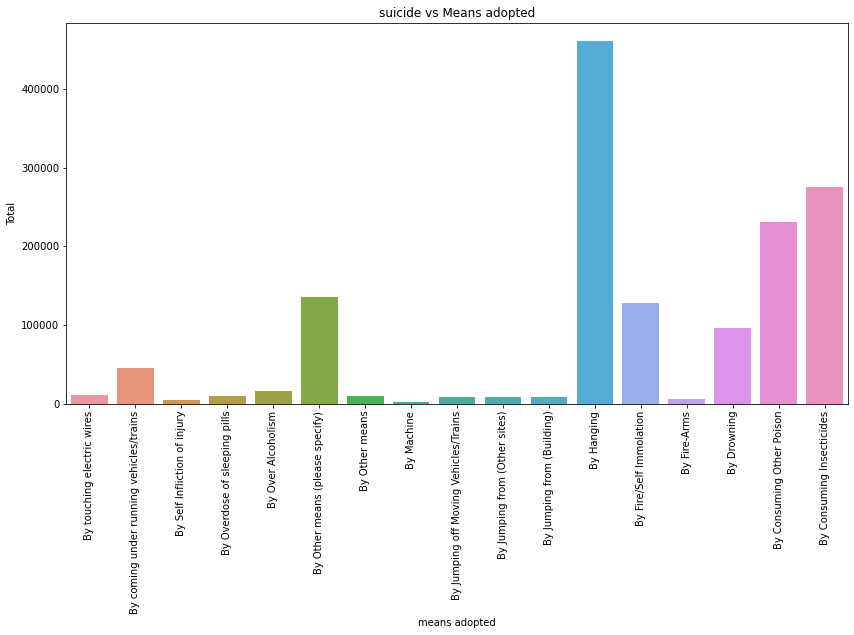

In [93]:
#suicide vs Means adopted
typecode3=suicide[suicide['Type_code']=='Means_adopted']
type3=typecode3.groupby('Type').sum( ).Total
means_ad=pd.DataFrame(type3).reset_index( ).sort_values('Type',ascending=False)
plt.figure(figsize=(14,7))
p1=sns.barplot(x='Type',y='Total',data=means_ad)
p1.set_xticklabels(p1.get_xticklabels( ), rotation=90)
plt.xlabel('means adopted')
plt.title('suicide vs Means adopted')
plt.show( )

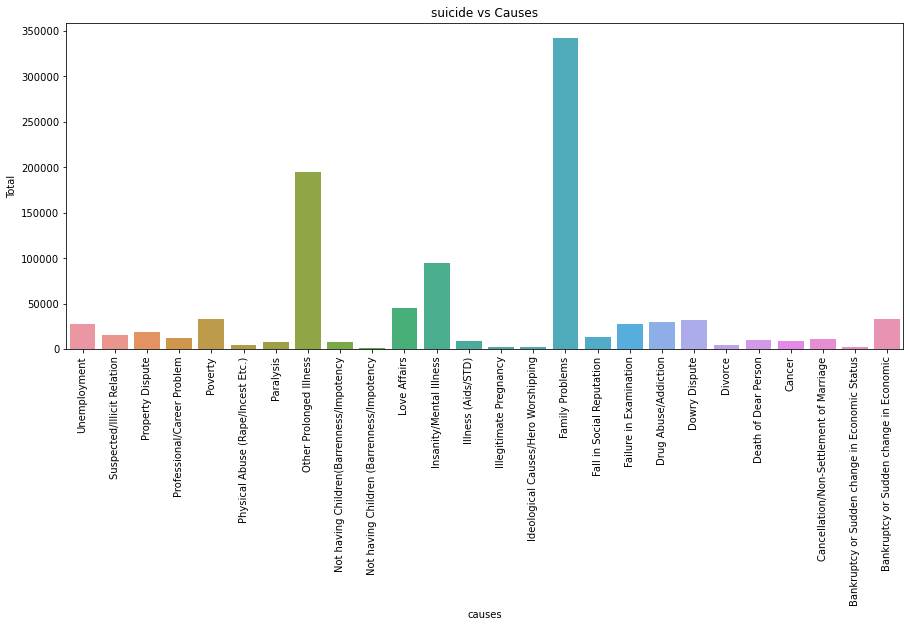

In [94]:
#suicide vs Causes
typecode4=suicide[suicide['Type_code']=='Causes']
type4=typecode4.groupby('Type').sum( ).Total
causes=pd.DataFrame(type4).reset_index( ).sort_values('Type',ascending=False)
plt.figure(figsize=(15,6))
p2=sns.barplot(x='Type',y='Total',data=causes)
p2.set_xticklabels(p2.get_xticklabels( ),rotation=90)
plt.xlabel('causes')
plt.title('suicide vs Causes')
plt.show( )

In [ ]:
#insights
#In age group 15-29 and 30-44 there is no significant difference in suicide count
#suicide in males in greater than females
#Maharashtra state has high suicide count
#Number of suicides are increasing every year
#By professional profile, housewives are most vulnerable which also correlates with data showing married committed more suicide.
#As the education status increases the suicide count decreases
#Another vulnerable groupis farming/agricultural activity
#cause of suicides is higher for family problems and other prolonged deseases